# Данные по газовым скважинам 

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook 

'''
    Нахождение скорости в м/мин. Принимает расход в бар/сут и диаметр в in
Внешний диаметр SNL 9 - 42 мм
'''

def velocity(Q, ID):
    ID = 0.0254*ID # Перевод в метры
    Q = 0.158987*Q    # Перевод в м^3/сут
    
    return Q/(3.14*(ID/2)**2)/(24*60)

velocity(6000, 3.95) ### м/мин

'''
    Нахождение скорости, с учётом размера прибора, в м/мин. Принимает расход в бар/сут и диаметр в in
Внешний диаметр SNL 9 - 42 мм
'''

def velocity_ring(Q, ID):
    ID = 0.0254*ID # Перевод в метры
    Q = 0.158987*Q    # Перевод в м^3/сут
    
    return Q/(3.14*((ID/2)**2-(0.042/2)**2))/(24*60)


# 1 - water, 2 - oil, 3 - gas

'''
    Функция retunr_I принимает в аргументы расход Q (m3/d), внутренний диаметр трубы Din (mm) 
и тип флюида: 1 - water, 2 - oil, 3 - gas.
Возвращает значение интенсивности по Лайтхиллу

'''
def return_I(Q, Din, type):
    Q = Q/24/3600
    # Q=[27 33 39 47 59 67]/24/3600;
    # 1BPD = 0.16 m3/d

    Din = Din*10**(-3) # in mm

    Dsnl = 42*10**(-3)
    d = (Din-Dsnl)/2
    rho_all = [1000, 780, 1.977]
    mu_all = [0.4*10**(-3), 10*10**(-3), 15*10**(-6)]
    c0_all = [1510, 1290, 430]

    rho=rho_all[type-1]
    mu=mu_all[type-1]
    c0=c0_all[type-1]

    Sin=3.1416*(Din/2)**2
    Ssnl=3.1416*(Dsnl/2)**2

    U=Q/(Sin-Ssnl)

    Re=rho*U*d/mu
    I=(rho*U**8*d**2)/(c0**5)*10**6

    result=[U, Re/1000, I*(10**18)]
    
    return I 


'''
    Функция recovery_Q принимает в аргументы критическую интенсивность по Лайтхиллу (Icr) 
и тип флюида: 1 - water, 2 - oil, 3 - gas.
Возвращает сгенерированный набор значений Q[bpd] и набор внутренних диаметров D[inc]

'''

def recovery_Q(Icr, type):
    Din_inc = [2.441, 2.259, 2.992, 2.750, 3.548, 3.476, 3.958, 3.5, 4.408, 4.044, 4.778,
           4.276, 6.366, 5.92, 5.54, 8.835, 8.435, 10.772, 10.5, 12.347, 12.125, 11.907]
    Din_inc.sort()
    Din = np.array(Din_inc)*25.4*10**(-3)
    Dsnl = 40*10**(-3)

    d = (Din-Dsnl)/2

    rho_all=[1000, 780, 150]
    mu_all=[0.4*10**(-3), 10*10**(-3), 0.02*10**(-3)]
    c0_all=[1510, 1290, 430]

    rho=rho_all[type-1]
    mu=mu_all[type-1]
    c0=c0_all[type-1]

    Sin = 3.1416*(Din/2)**2
    Ssnl = 3.1416*(Dsnl/2)**2

    Ucr = (Icr*c0**5/(10**6*rho*d**2))**(1/8)
    Qcr = np.round(Ucr*(Sin-Ssnl)*24*3600/0.16)
    Qcr_m3 = np.round(Ucr*(Sin-Ssnl)*24*3600)
    
    return Qcr, Din_inc

excel_data = pd.read_excel('TGT_gas.xlsx',  sheet_name='Лист1')
excel_data

,Well,Type of well,Type of fluid,"Pressure, psi",OD,ID,Centralize,Tool,Chorus QC (LFP/HFP),"Max flow rates, BPD",LFP,HFP
0,NBU-503,Gas producer,Gas+Oil,NaN,"2,375""",2.04100,-,9a,good/good,428.0,1,1
1,B-03,Gas producer,Gas,243.00,7,6.18402,+,9a,good/good,1531.0,1,1
2,5100,Gas mining,Gas,7083.45,4.5,3.82598,-,9a,good/good,1887.0,1,1
3,12504,Gas mining,Gas,3027.27,"4,5""",3.90551,-,9a,good/good,2076.0,1,1
4,34G,Gas Injector,Gas,1274.14,4.5,3.90551,-,9a,good/good,4958.0,1,1
5,BRNW-51H1,Gas producer,Gas,1623.00,4.5,3.74000,-,10a,good/good,6101.0,1,1
6,34G(2021),Gas injection,Gas,1234.46,7,6.30709,-,9a,good/good,7724.0,1,1
7,32,Газонагнетательная,Gas,1437.00,4.5,3.90551,-,9a,good/good,8730.0,1,1
8,31,Gas injection,Gas,1278.55,4.5,3.90551,-,9a,good/good,8965.5,1,1
9,31,Gas injection,Gas,1278.55,7,6.30709,-,9a,good/good,8965.5,1,1


## Chorus 9A


<IPython.core.display.Javascript object>


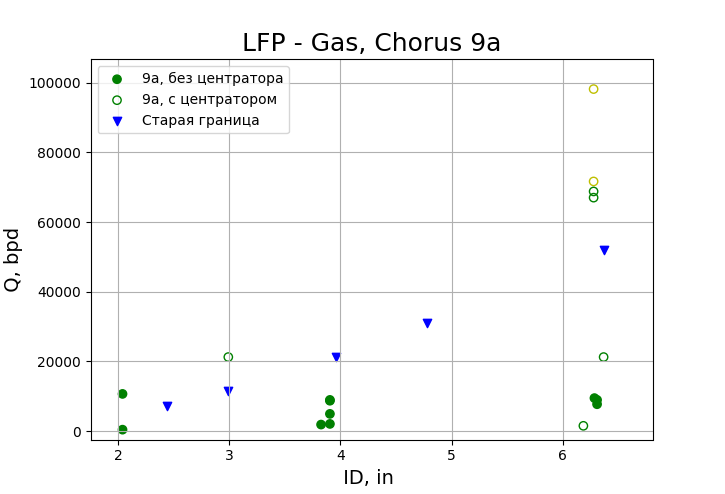

"for i in range(len(Q)):\n    ax.annotate(f'{np.array(name)[i]}', xy=(np.array(ID)[i], np.array(Q)[i]), fontsize=10)"

In [99]:
fig, ax = plt.subplots() 

chor = '9a'
freq = 'LFP'

data = excel_data.query(f"Tool == '{chor}' & Centralize != '+' & Well != 'Almetyevsk(2021)' & Well != 'Almetyevsk'")

ID = data['ID']
Q = data['Max flow rates, BPD']
name =  data['Well']
centralize = data['Centralize']

c = np.array(data[f'{freq}'])
d = {1:'g', 2:'y', 3:'r'}

ID_old = [2.441, 2.992, 3.958, 4.778, 6.366, 8.835, 12.347] ## in
Q_old = [7200, 11500, 21400, 31000, 52000, 67400, 172600]  ## bpdQ

ax.scatter(ID, Q, c=[d[i] for i in c], marker='o')

### Для данных с центратором
data_centr = excel_data.query(f"Tool == '{chor}' & Centralize == '+' & Well != 'Almetyevsk(2021)' & Well != 'Almetyevsk'")
ID_centr = data_centr['ID']
Q_centr = data_centr['Max flow rates, BPD']
c_centr = np.array(data_centr[f'{freq}'])

ax.scatter(ID_centr, Q_centr, facecolors= 'none', edgecolors=[d[i] for i in c_centr], marker='o')
### end 

ax.scatter(ID_old, Q_old, marker='v', color='b')
ax.legend([f'{chor}, без центратора', f'{chor}, с центратором', 'Старая граница'])

plt.grid()
ax.set_ylabel(' Q, bpd    ',
              fontsize = 14,    #  размер шрифта
              color = 'black')     #  ширина крайней линии

ax.set_xlabel(' ID, in  ',
              fontsize = 14,
              color = 'black')
ax.set_title(f'{freq} - Gas, Chorus {chor}', fontsize=18)


'''for i in range(len(Q)):
    ax.annotate(f'{np.array(name)[i]}', xy=(np.array(ID)[i], np.array(Q)[i]), fontsize=10)'''
    

<IPython.core.display.Javascript object>


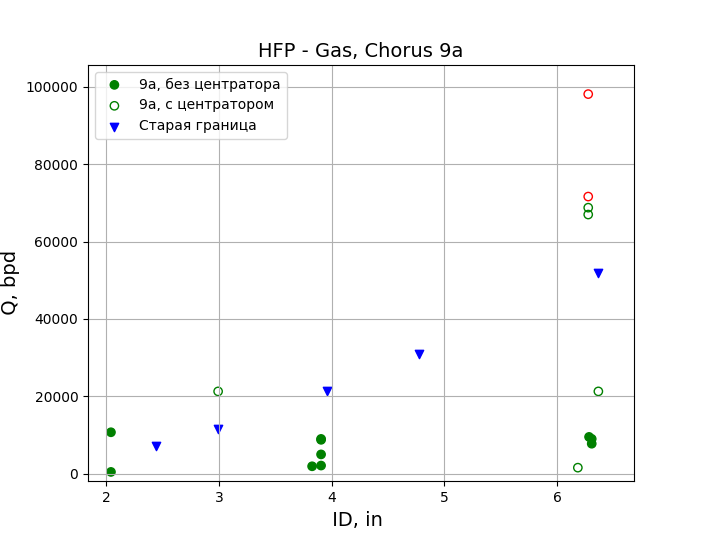

Text(0.5, 0, ' ID, in  ')

In [103]:
fig, ax = plt.subplots() 

chor = '9a'
freq = 'HFP'

data = excel_data.query(f"Tool == '{chor}' & Centralize != '+' & Well != 'Almetyevsk(2021)' & Well != 'Almetyevsk'")

ID = data['ID']
Q = data['Max flow rates, BPD']
name =  data['Well']
centralize = data['Centralize']

c = np.array(data[f'{freq}'])
d = {1:'g', 2:'y', 3:'r'}

ID_old = [2.441, 2.992, 3.958, 4.778, 6.366, 8.835, 12.347] ## in
Q_old = [7200, 11500, 21400, 31000, 52000, 67400, 172600]  ## bpd
v_old = [velocity_ring(Q, ID) for Q, ID in zip(Q_old, ID_old)]

ax.scatter(ID, Q, c=[d[i] for i in c], marker='o')

### Для данных с центратором
data_centr = excel_data.query(f"Tool == '{chor}' & Centralize == '+' & Well != 'Almetyevsk(2021)' & Well != 'Almetyevsk'")
ID_centr = data_centr['ID']
Q_centr = data_centr['Max flow rates, BPD']
c_centr = np.array(data_centr[f'{freq}'])

ax.scatter(ID_centr, Q_centr, facecolors= 'none', edgecolors=[d[i] for i in c_centr], marker='o')
### end 

ax.scatter(ID_old, Q_old, marker='v', color='b')
ax.legend([f'{chor}, без центратора', f'{chor}, с центратором', 'Старая граница'])
ax.set_title(f'{freq} - Gas, Chorus {chor}', fontsize=14)

plt.grid()
ax.set_ylabel(' Q, bpd    ',
              fontsize = 14,    #  размер шрифта
              color = 'black')     #  ширина крайней линии

ax.set_xlabel(' ID, in  ',
              fontsize = 14,
              color = 'black')

## Расчёт интенсивностей по Лайтхиллу и нахождение критического значения

<IPython.core.display.Javascript object>


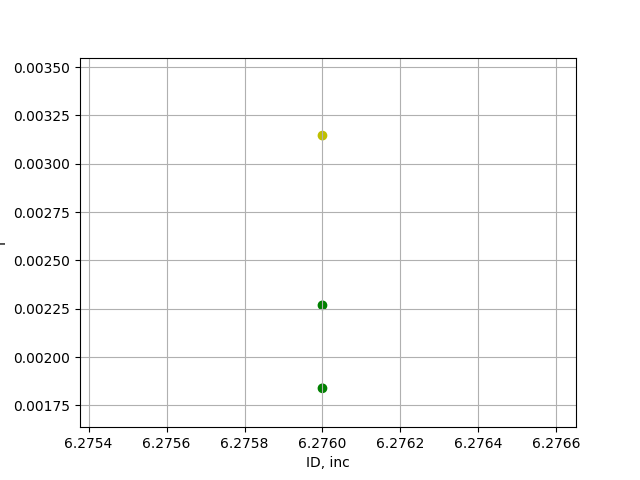

In [105]:
freq = 'LFP'

data = excel_data.query(f"Tool == '9a' & Well != 'Almetyevsk(2021)' & Well != 'Almetyevsk'")

ID = data['ID']
Q = data['Max flow rates, BPD']
name =  data['Well']

c = np.array(data[f'{freq}'])
grade = data['LFP']
grade = np.array(grade)
d = {1:'g', 2:'y', 3:'r'}

I_mass = [return_I(Q*0.16, D*25.4, type=3) for Q, D in zip(Q, ID)]

plt.scatter(ID, I_mass, c = [d[i] for i in grade])
plt.xlabel('ID, inc')
plt.ylabel('I')
plt.grid()

### Получили Icr порядка 0.0025
### Сгенерируем кривую по этому параметру 

<IPython.core.display.Javascript object>


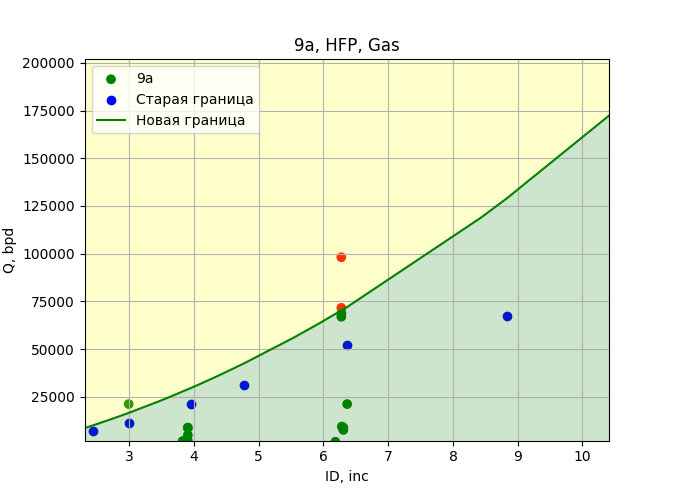

In [124]:
freq = 'HFP'
Icr = 0.2

data = excel_data.query(f"Tool == '9a' & Well != 'Almetyevsk(2021)' & Well != 'Almetyevsk'")

ID = data['ID']
Q = data['Max flow rates, BPD']

c = np.array(data[f'{freq}'])
d = {1:'g', 2:'y', 3:'r'}

Q_Lite, Dinc = recovery_Q(Icr, type=3)

ID_old = [2.441, 2.992, 3.958, 4.778, 6.366, 8.835, 12.347] ## in
Q_old = [7200, 11500, 21400, 31000, 52000, 67400, 172600]  ## bpd

plt.scatter(ID, Q, c=[d[i] for i in c])
plt.scatter(ID_old, Q_old, c='b')
plt.plot(Dinc, Q_Lite, 'g')
plt.fill_between(Dinc, Q_Lite, 0, facecolor='green', alpha = 0.2)
plt.fill_between(Dinc, Q_Lite, max(Q_Lite), facecolor='yellow', alpha = 0.2)

plt.xlabel('ID, inc')
plt.ylabel('Q, bpd')
plt.title(f'9a, {freq}, Gas')
plt.legend(['9a', 'Старая граница', 'Новая граница'])
plt.grid()